# Code to create violin plots for HRApop validations 

## Import statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

C:\Users\abueckle\AppData\Local\Temp\ipykernel_85272\1518431845.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Global variables

In [2]:
hra_pop_version = "0.9.0"

## Import data

In [3]:
validation_data = pd.read_csv(filepath_or_buffer=f"../../hra-pop/output-data/v{hra_pop_version}/reports/atlas/validation-v2p1.csv")

## Functions for formatting and plotting

In [41]:
# Define a function to format tick labels
def format_ticks(x):
  """
  Takes a number and returns it with one decimal

  Args:
  x (float): a number

  Returns:
  float: the number with one decimal
  """
  return '{:.1f}'.format(x)

def plot(tool):
  """
  Creates a violin plot for one tool only

  Args:
  tool (string): a cell type annotation tool
  """
  for_plot = validation_data[(validation_data.as_tool == tool) & (validation_data.tool ==tool)]
  violin = sns.violinplot(data=for_plot, x="as_label", y="similarity", density_norm="width", cut=0, inner="box", hue="as_in_collisions", split=True)
  
  # add strip plot with jitter
  sns.stripplot(data=for_plot, x="as_label", y="similarity", jitter=True, dodge=True, hue="as_in_collisions", linewidth=1, edgecolor="black")
  
  set_theme(violin=violin)

def set_theme(violin):
  """
  Takes a plot and adds a theme

  Args:
  violin (sns plot): a violin plot
  """
  violin = violin
  
  plt.xticks(rotation=90)
  sns.set_theme(rc={'figure.figsize':(40,15)})
  
  #  change the axis labels
  violin.set_xlabel("Anatomical Structure", fontsize=30)
  violin.set_ylabel("Weighted Cosine Similarity", fontsize=30)

  # get the Axes object of the current plot
  ax = plt.gca()

  # Change the size of the x-axis tick labels
  ax.tick_params(axis='x', labelsize=25)
  ax.tick_params(axis='y', labelsize=25)
  plt.legend(title="Does dataset actually collide with\n anatomical structure?", loc="best")
  plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
  plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title 
  
def report_numbers(as_label, tool, as_in_collisions):
  """Prints the number of datasets analyzed for all anatomical structures with one tool and given whether the dataset actually does collide with the AS

  Args:
      as_label (string ): AS label
      tool (string): CTAnn tool
  """
  print(f"{len(validation_data[(validation_data.as_label == as_label) & (validation_data.as_tool == tool) & (validation_data.tool == tool) & (validation_data.as_in_collisions == as_in_collisions)].dataset.unique())} datasets were annotated through {tool} for {as_label} where the extraction site of the dataset actually does collide with the AS is {as_in_collisions}.")

## Total numbers

In [42]:
as_label = "right atrium"
datasets_for_right_atrium = validation_data[validation_data.as_label == as_label]
print(f"The total number of datasets in the {as_label} is: {len(datasets_for_right_atrium.dataset.unique())}")

The total number of datasets in the right atrium is: 190


### Azimuth

16 datasets were annotated through azimuth for right atrium where the extraction site of the dataset actually does collide with the AS is True.
123 datasets were annotated through azimuth for right atrium where the extraction site of the dataset actually does collide with the AS is False.


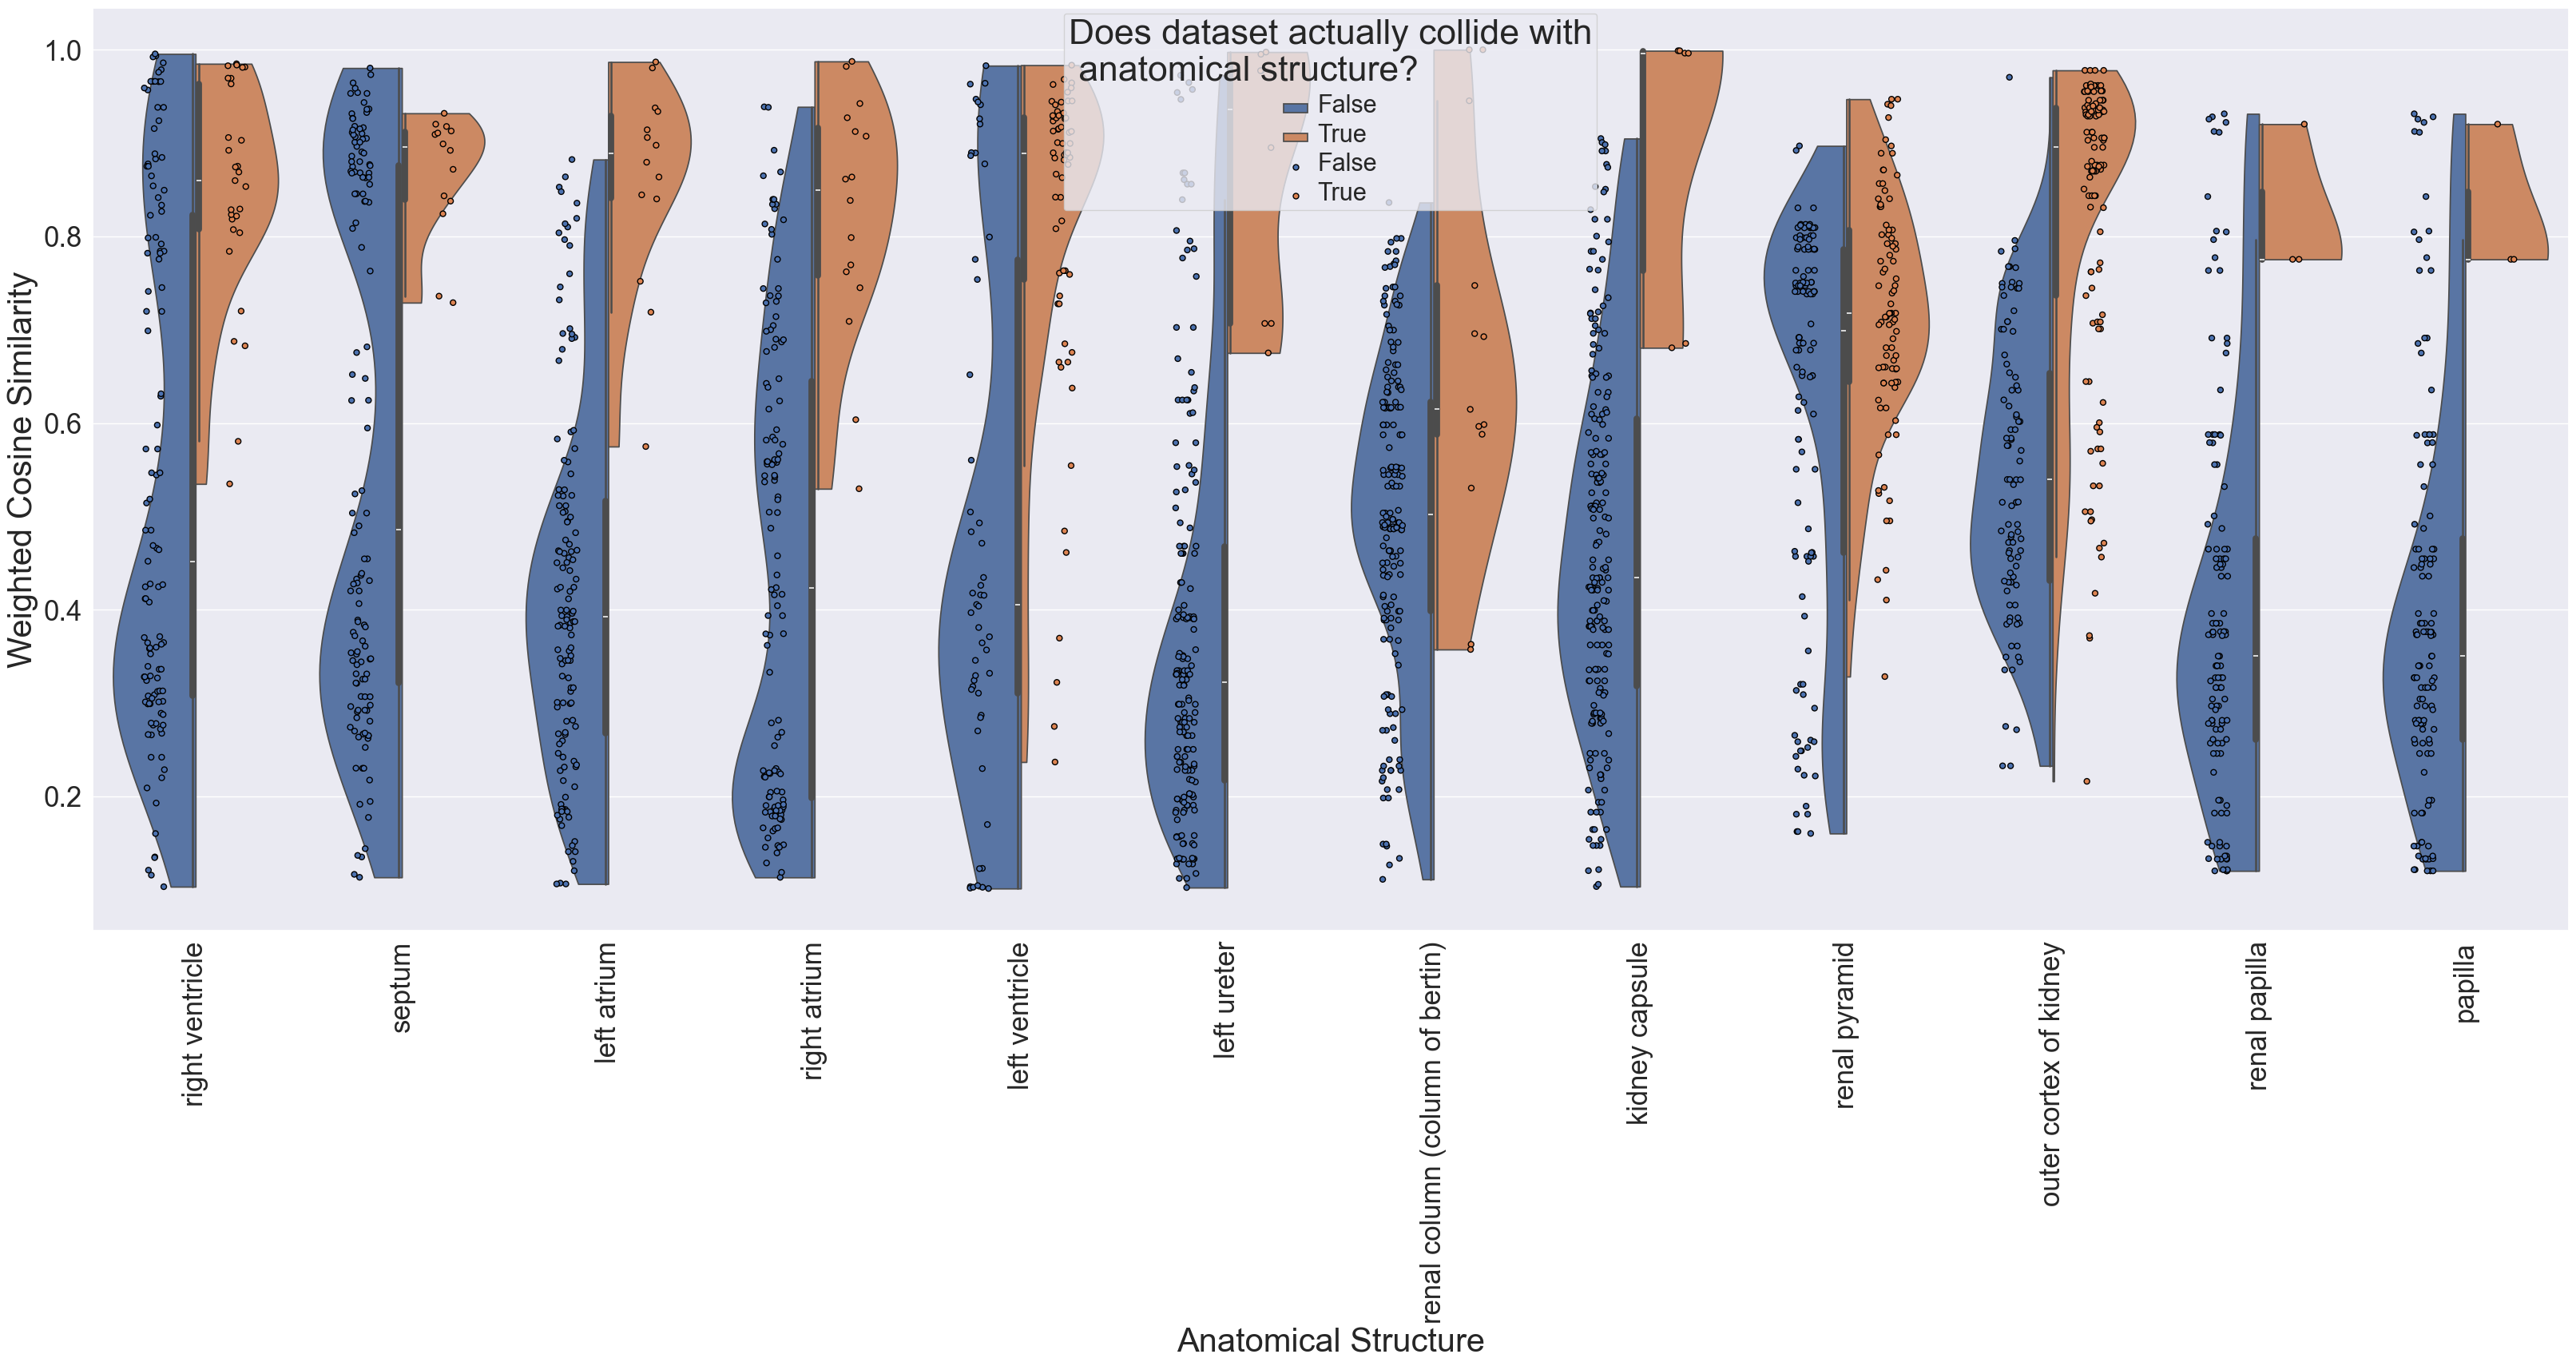

In [43]:
tool = "azimuth"
report_numbers("right atrium", tool, True)
report_numbers("right atrium", tool, False)
plot(tool)

### CellTypist

16 datasets were annotated through celltypist for right atrium where the extraction site of the dataset actually does collide with the AS is True.
101 datasets were annotated through celltypist for right atrium where the extraction site of the dataset actually does collide with the AS is False.


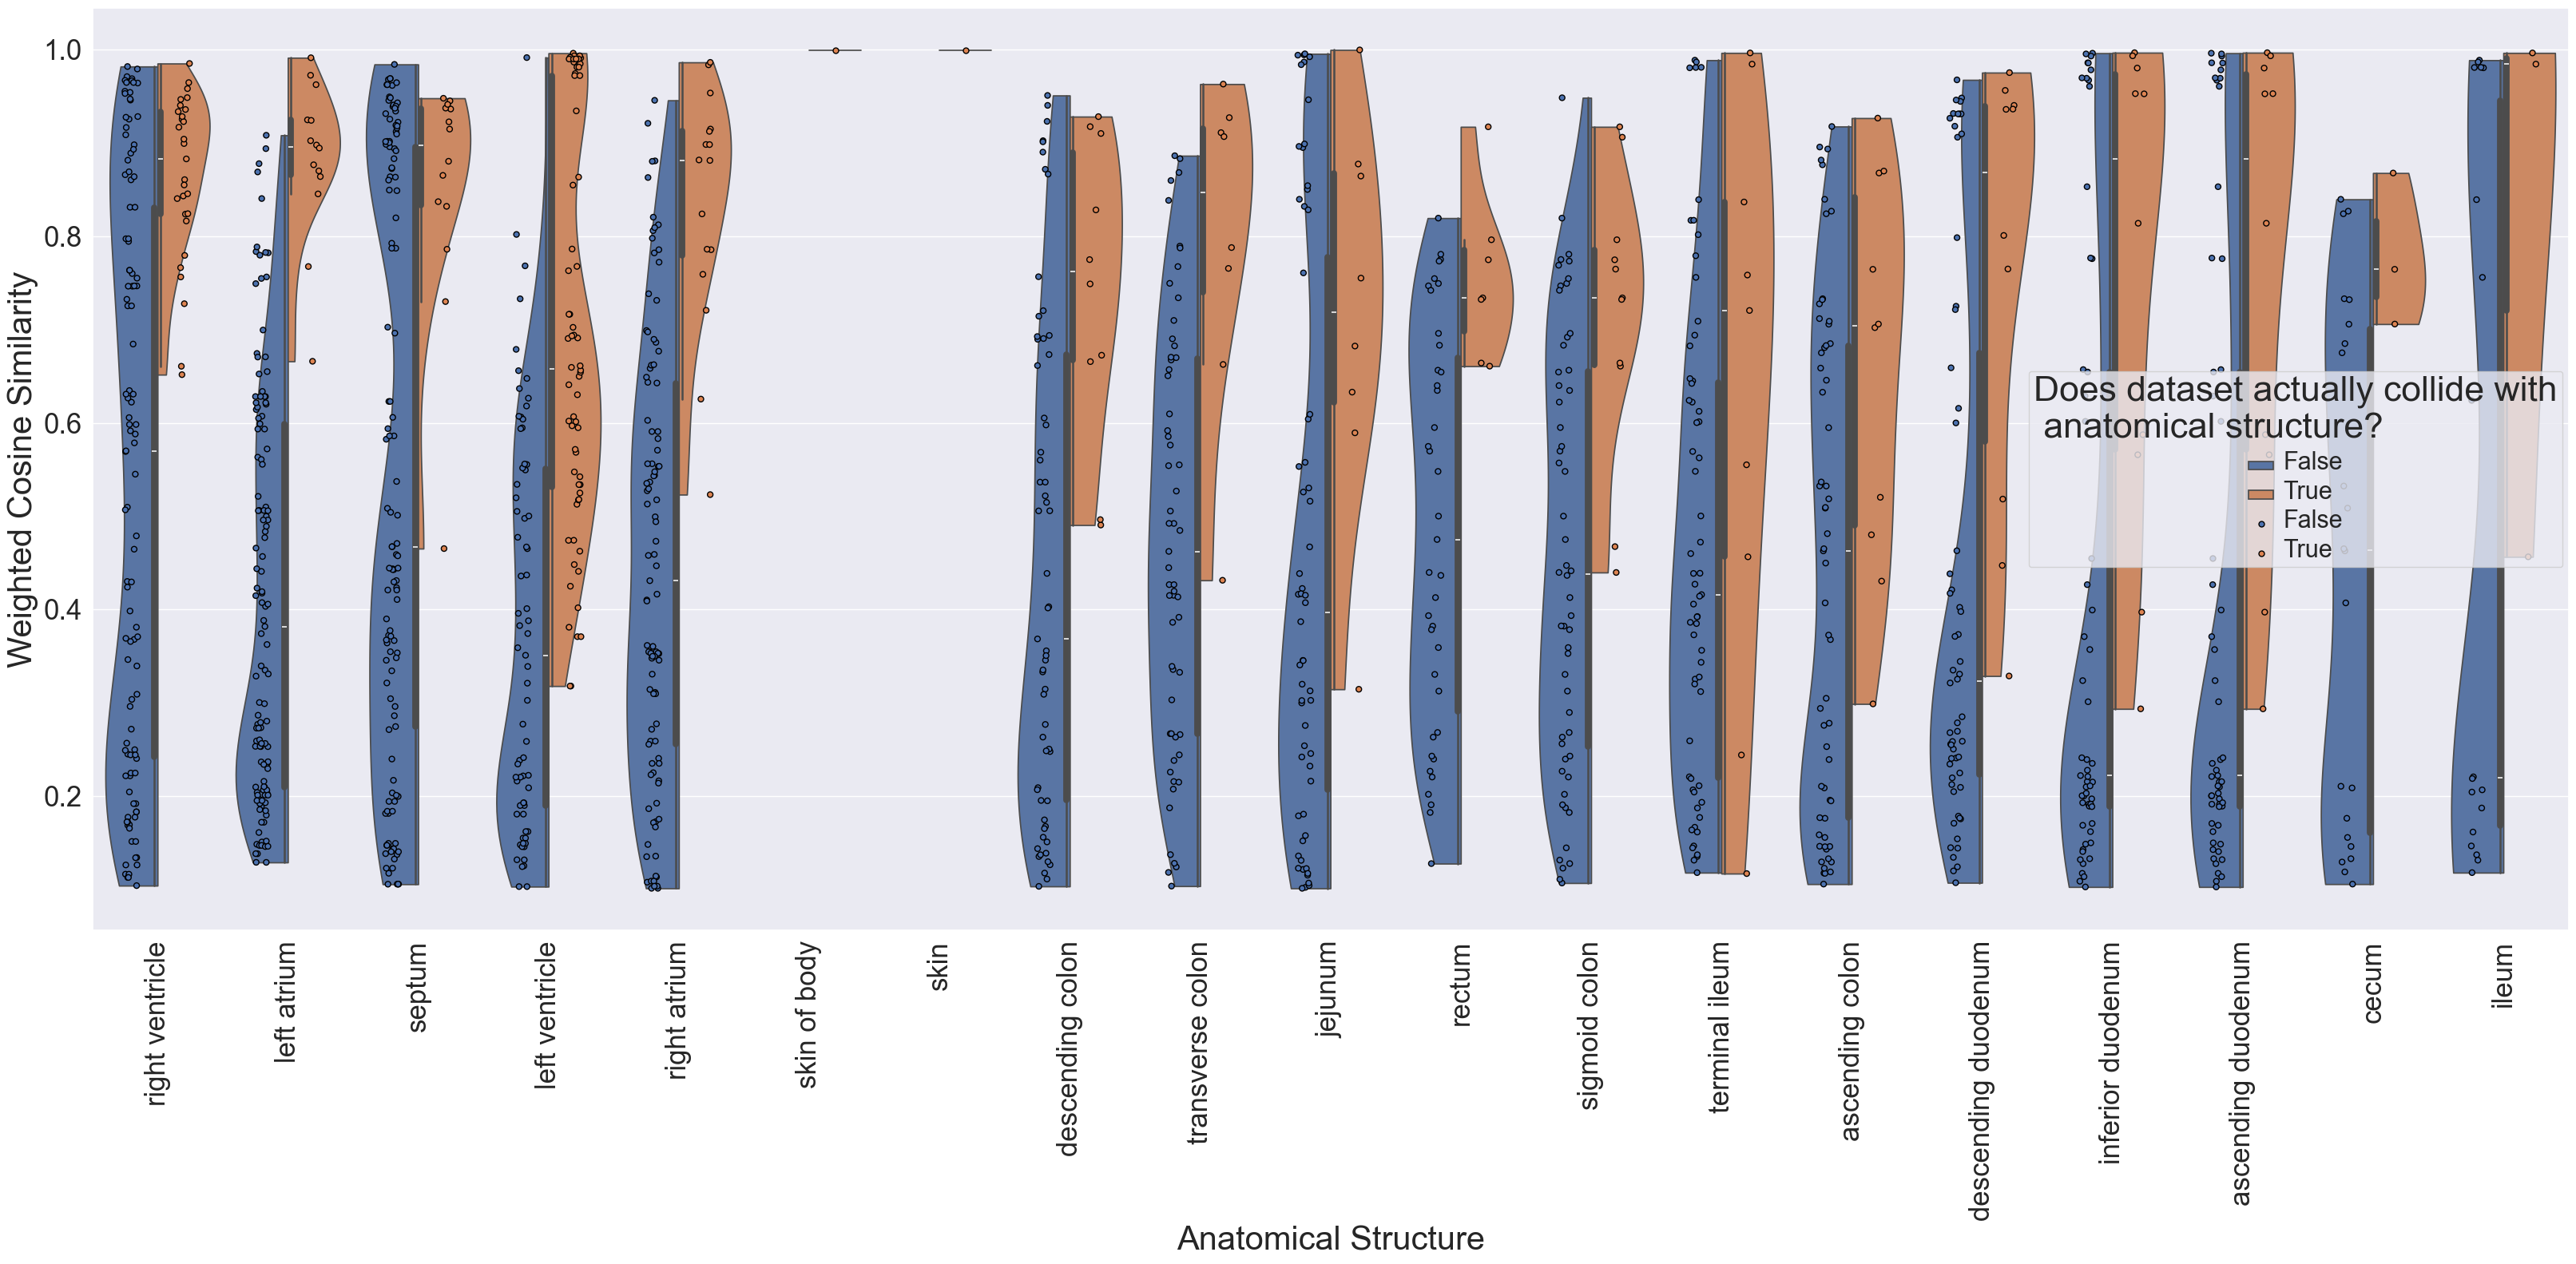

In [44]:
tool = "celltypist"
report_numbers("right atrium", tool, True)
report_numbers("right atrium", tool, False)
plot(tool)

### popV

16 datasets were annotated through popv for right atrium where the extraction site of the dataset actually does collide with the AS is True.
114 datasets were annotated through popv for right atrium where the extraction site of the dataset actually does collide with the AS is False.


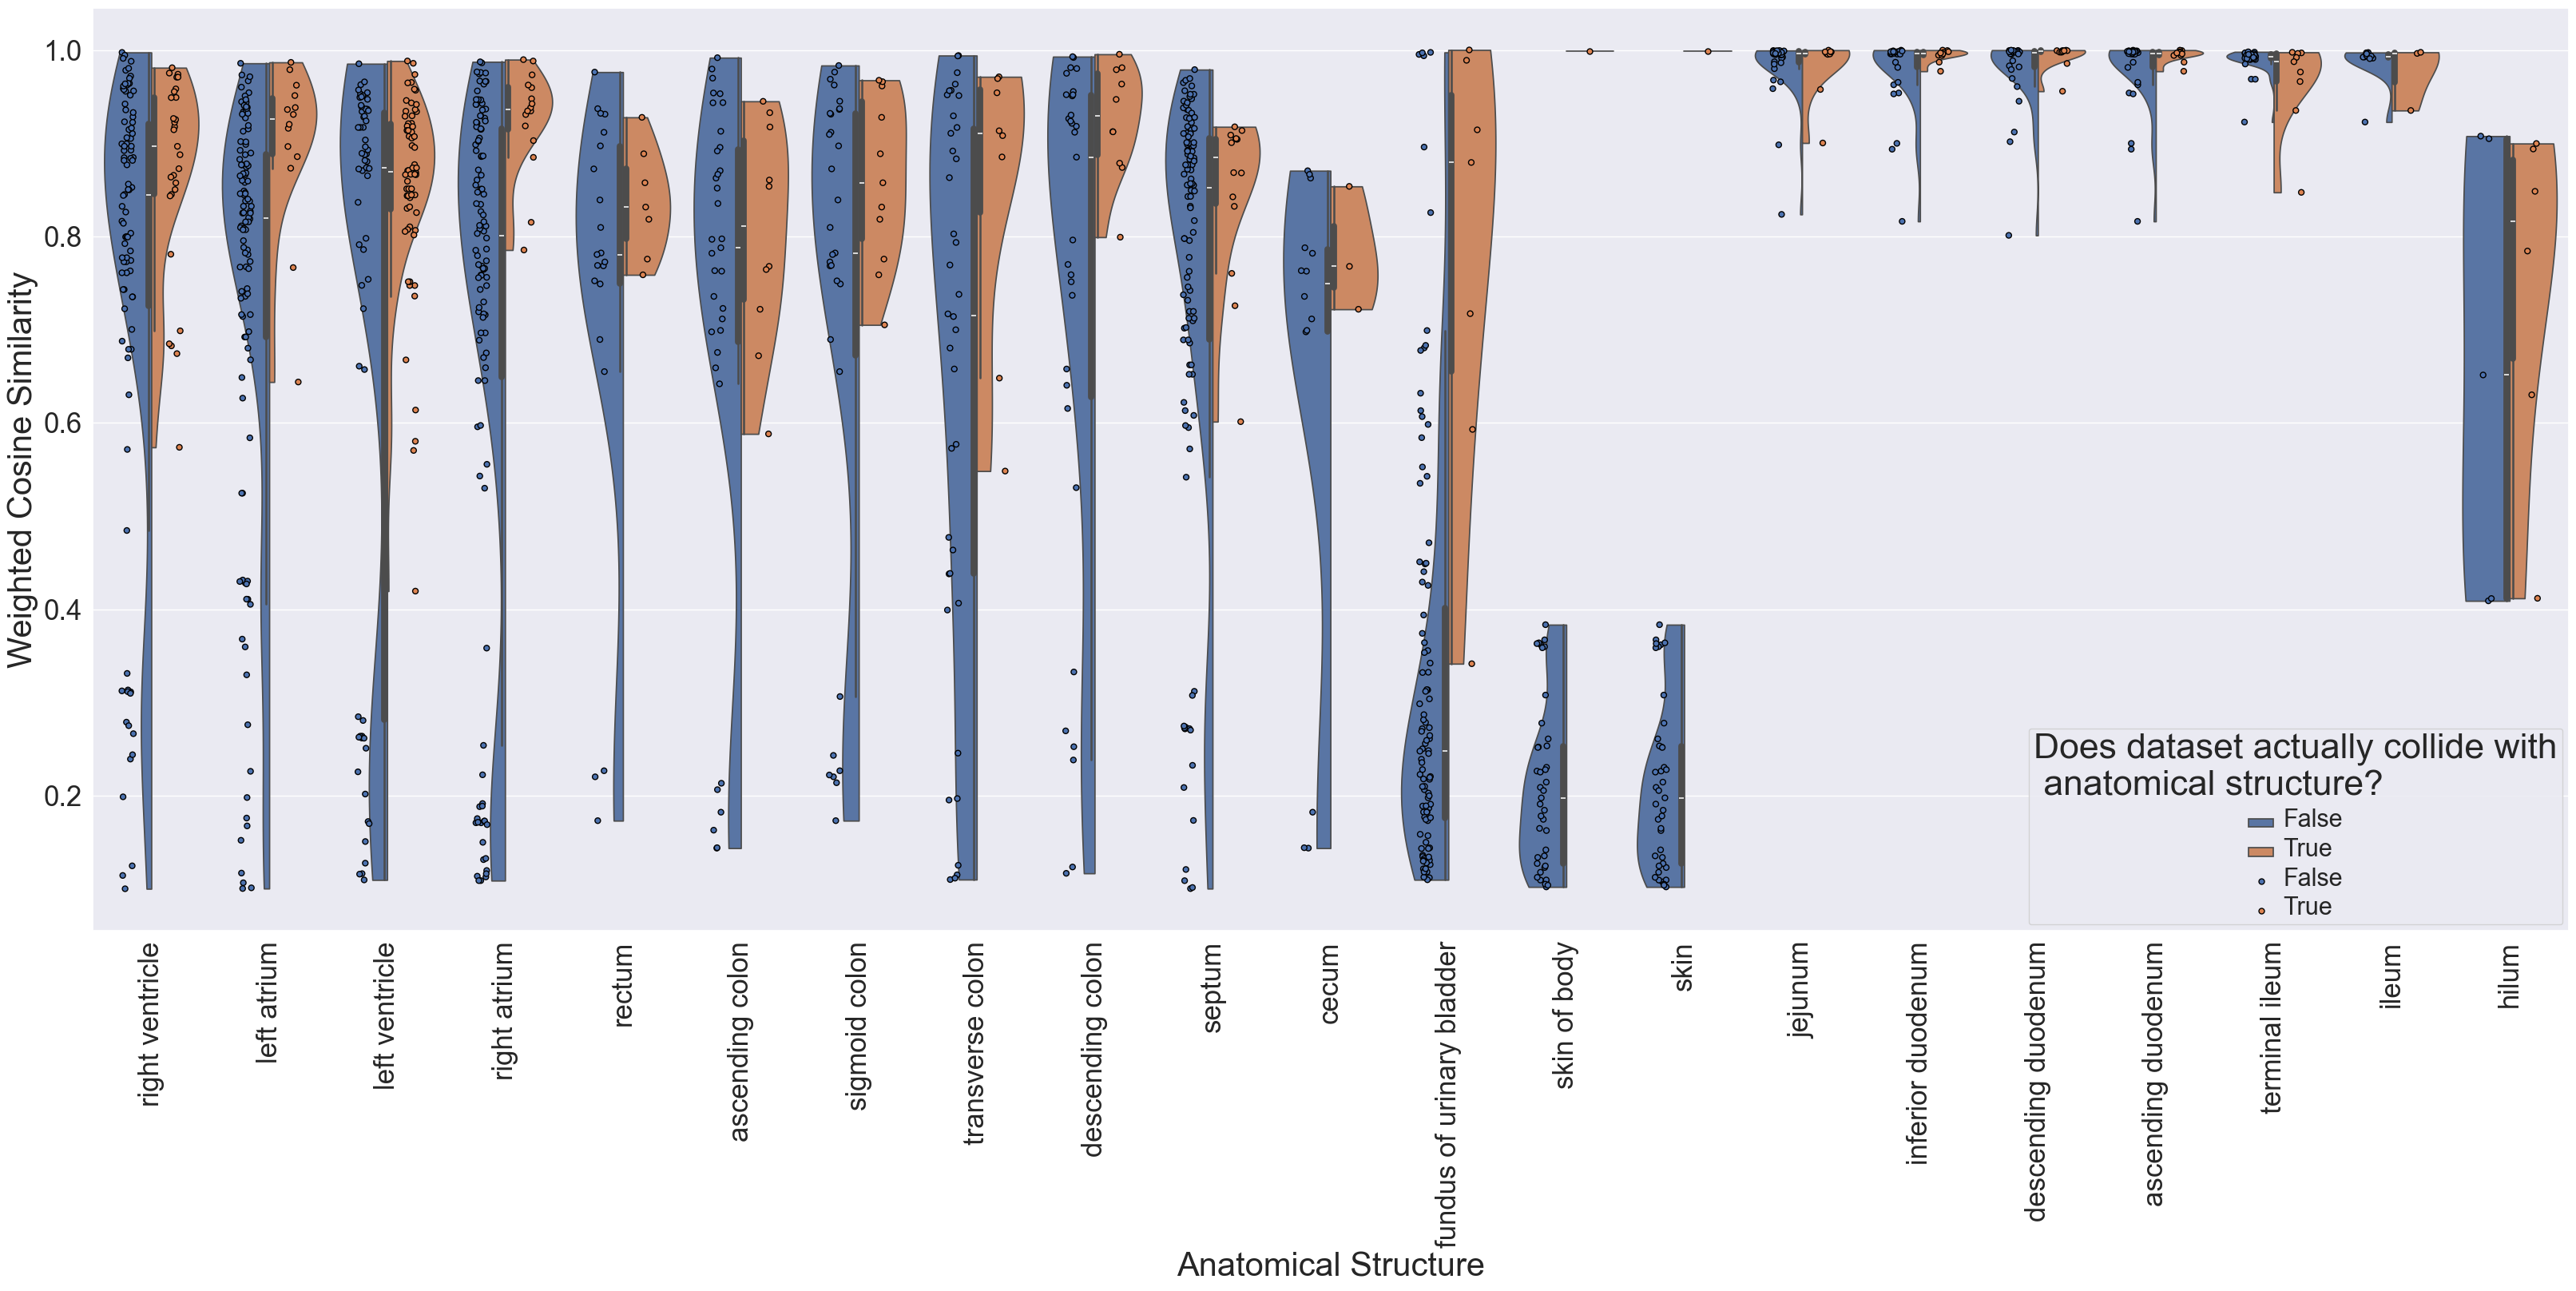

In [45]:
tool = "popv"
report_numbers("right atrium", tool, True)
report_numbers("right atrium", tool, False)
plot(tool)